# Learning Gate - Reto: Explorando el índice de felicidad

## Data Science Fundamentals - Plottin Insights Using Python

- *1.Genera una libreta en Google Colab, cuya estructura esté basada en los análisis solicitados*

### Importing Libraries

In [1]:
import os, glob
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sci
import matplotlib.pyplot as plt

%matplotlib inline

### Loading Data

- *2.	Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv*

In [2]:
path = os.path.join(os.getcwd(), 'Data')
files = glob.glob(os.path.join(path, '*.csv'))

df_happyWW = pd.read_csv(os.path.join(path, files[0]))
df_meta = pd.read_csv(os.path.join(path, files[1]))

***Renaming Columns Names, facilitating data manipulation***

In [3]:
new_cols = {}
for col in df_happyWW.columns:
    new_cols[col] = col.replace(' ', '_').lower()

df_happyWW.rename(columns=new_cols, inplace=True)

### Exploratory Data Analysis

- 3.	A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [4]:
df_happyMX = df_happyWW[df_happyWW.country_or_region.str.strip().str.lower()=='mexico'].copy()
df_happyMX.set_index('country_or_region', inplace=True)
display(df_happyMX)

,overall_rank,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
country_or_region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


#### Scores Histogram

- 4.	Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto

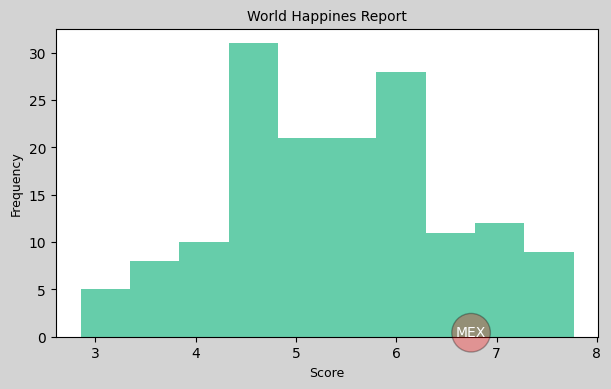

In [5]:
fig, ax = plt.subplots(1,1, figsize=(7,4), facecolor='lightgray')
df_happyWW.score.plot(kind='hist', color='mediumaquamarine', ax=ax);
ax.set_xlabel('Score', fontsize=9)
ax.set_ylabel('Frequency', fontsize=9)
ax.set_title('World Happines Report', fontsize=10)

props_bbox = {'boxstyle': 'circle',
              'facecolor': 'red',
              'alpha': 0.3}
              #'transform':ax.transAxes}
value = df_happyMX.score.values[0]
plt.text(value,0,'MEX', color='w', bbox=props_bbox);

#### Healthy Life EXpentancy Boxplot

- *5.	Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación*

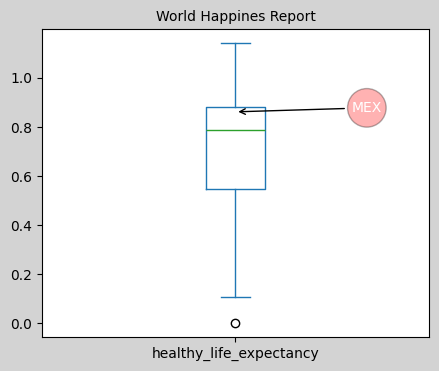

In [6]:
fig, ax = plt.subplots(1,1, figsize=(5,4), facecolor='lightgray')
df_happyWW.healthy_life_expectancy.plot(kind='box');
ax.set_title('World Happines Report', fontsize=10)

pos = df_happyMX.healthy_life_expectancy.values[0]
props_adict={'arrowstyle':'->'}
props_bdict = {'boxstyle': 'circle',
              'facecolor': 'red',
              'alpha': 0.3}
              #'transform':ax.transAxes}

plt.annotate('MEX', color='w',xy=(1,pos),xytext=(1.3,pos),arrowprops=props_adict,bbox=props_bdict);

#### Mexico Case - Weights of Factors related to the Population Happiness

- *6.	Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México*

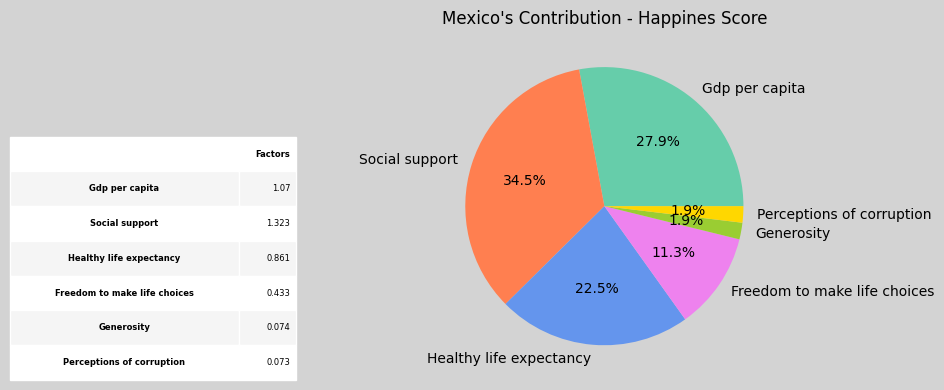

In [7]:
df_tmp = df_happyMX[df_happyMX.columns[2:]].copy()
new_cols = {}
for col in df_tmp.columns:
    new_cols[col] = col.replace('_', ' ').capitalize()

df_tmp.rename(columns=new_cols, inplace=True)
df_tmp = df_tmp.T
df_tmp.reset_index(inplace=True)
df_tmp.rename(columns={'index':'', 'Mexico':'Factors'}, inplace=True)

#fig, axs = plt.subplots(figsize=(15,4), facecolor='lightgray')
fig = plt.figure(figsize=(10,4), facecolor='lightgray')

fig.subplots_adjust(left=0.2,wspace = 0.1)
ax1 = plt.subplot2grid((1,3),(0,0)) 
bbox=[0, 0, 1, 1]
ax1.axis('off')

table = ax1.table(cellText=df_tmp.values, bbox=[0,0,1,.7], colLabels=df_tmp.columns, colWidths=[.8,.2])

for (row,col), cell in table.get_celld().items():
        
    if (row == 0) & (col==0):
        cell.set_facecolor('white')
        cell.set_edgecolor('white')    
    elif (row == 0) & (col==1):
        cell.set_text_props(weight='bold', horizontalalignment='right')
        cell.set_facecolor('white')
        cell.set_edgecolor('white')
    
    elif (row%2 == 0):
        if  col == 0:
            cell.set_text_props(weight='bold', horizontalalignment='center', fontsize=15)
        cell.set_edgecolor('white')
        cell.set_facecolor('white')
    elif (row%2 == 1):
        if col == 0:
            cell.set_text_props(weight='bold', horizontalalignment='center')
        cell.set_edgecolor('white')
        cell.set_facecolor('whitesmoke')        

        
#ax2 = axs[1]
ax2 = plt.subplot2grid((1,3),(0,1),colspan=2) 
plt.subplots_adjust(wspace=0.0,hspace=0.1)
ax2.set_title("Mexico's Contribution - Happines Score", fontsize=12)
df_per = (df_happyMX[df_happyMX.columns[2:]]/df_happyMX[df_happyMX.columns[2:]].sum(axis=1).values[0]*100).T
colors = ['mediumaquamarine', 'coral', 'cornflowerblue', 'violet', 'yellowgreen', 'gold']
labels = [col.replace('_', ' ').capitalize() for col in df_per.index.tolist()]
ax2 = plt.pie(df_per.Mexico, colors=colors, labels=labels, autopct='%1.1f%%');

plt.tight_layout()

#### Analysis of Factors related to the Population Happiness - Comparison among Countries of Interest

- *7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores*

C:\Users\alfde\AppData\Local\Temp\ipykernel_31400\2390262641.py:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ranks = df_happyWW[['overall_rank']].agg([max, min]).overall_rank.tolist()
C:\Users\alfde\AppData\Local\Temp\ipykernel_31400\2390262641.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ranks = df_happyWW[['overall_rank']].agg([max, min]).overall_rank.tolist()


Text(0.5, 1.0, 'World Happines Report')

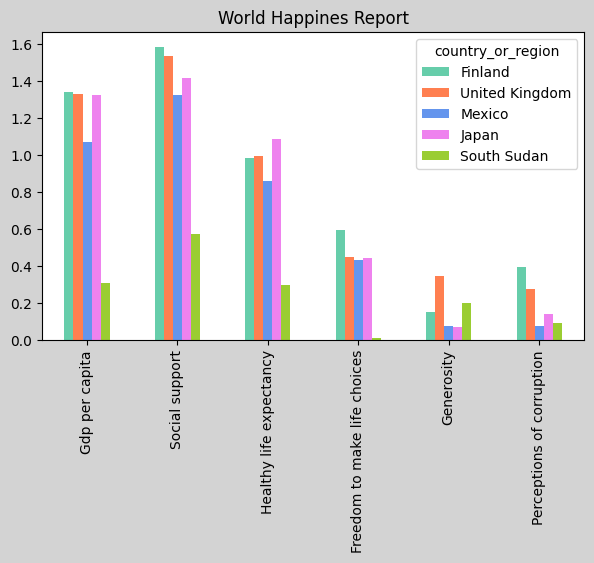

In [8]:
ranks = df_happyWW[['overall_rank']].agg([max, min]).overall_rank.tolist()
idxs = df_happyWW[df_happyWW.overall_rank.isin(ranks)].index.tolist()

cntrs2keep = []
for country in ['mexico', 'japan', 'united kingdom', 'china', 'korea']:
    if country in df_happyWW.country_or_region.str.lower().unique():
        cntrs2keep.append(country)

idxs += df_happyWW[df_happyWW.country_or_region.str.lower().isin(cntrs2keep[:3])].index.tolist()
df_tmp = df_happyWW.loc[idxs].copy()
df_tmp.sort_values('overall_rank', inplace=True)
df_tmp.set_index('country_or_region', inplace=True)
df_tmp.drop(['overall_rank', 'score'], axis=1, inplace=True)
new_cols = {}
for col in df_tmp.columns:
    new_cols[col] = col.replace('_', ' ').capitalize()
df_tmp.rename(columns=new_cols, inplace=True)

fig, ax = plt.subplots(1,1, figsize=(7,4), facecolor='lightgray')
df_tmp.T.plot(kind="bar", color=colors, ax=ax)
ax.set_title('World Happines Report', fontsize=12)

#### Relationships among Factors related to the Population Happiness

- *8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.*

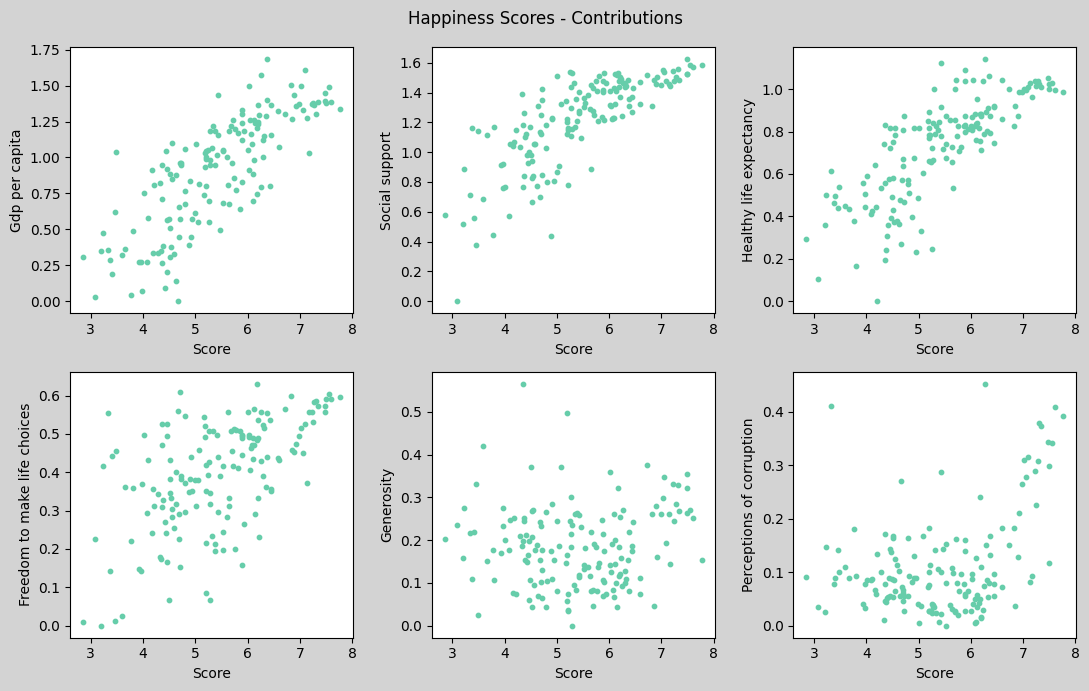

In [9]:
fig, axs = plt.subplots(2,3, figsize=(11,7), facecolor='lightgray')
axs = axs.ravel()
fig.suptitle('Happiness Scores - Contributions')

for i, col in enumerate(df_happyWW.columns[3:]):
    ax = plt.subplot(2, 3, i + 1)
    ax.set_ylabel(labels[i])
    ax = plt.scatter(df_happyWW.score.values, df_happyWW[col], color=colors[0], s=10) 
    plt.xlabel('Score')

plt.tight_layout()

#### Correlations among factors that affect the Happines of the population

- *Comprueba lo anterior con un heatmap donde incluyas los índices de correlación*

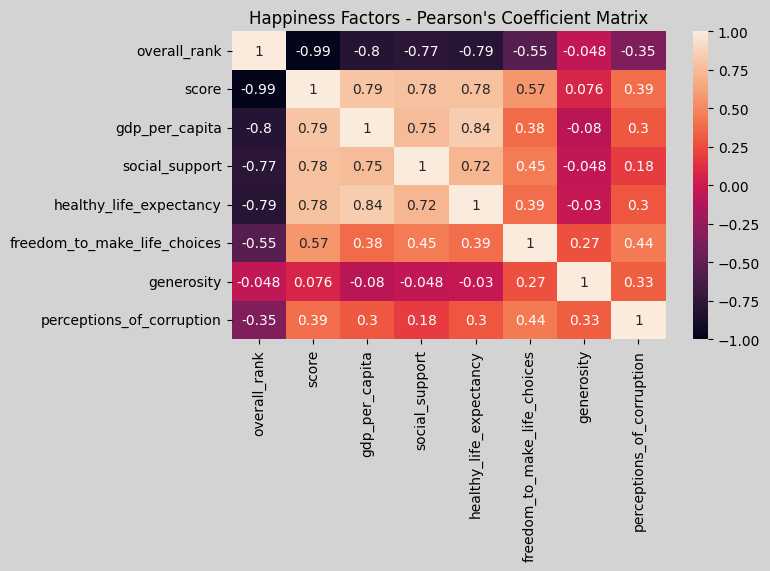

In [10]:
fig, ax = plt.subplots(1,1, figsize=(7,4), facecolor='lightgray')
ax.set_title("Happiness Factors - Pearson's Coefficient Matrix")
sns.heatmap(df_happyWW.drop('country_or_region', axis=1).corr(), vmin=-1, vmax=1, annot=True, ax=ax);

#### Analyzing the Population Happiness by Regions

- *9.	Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región*

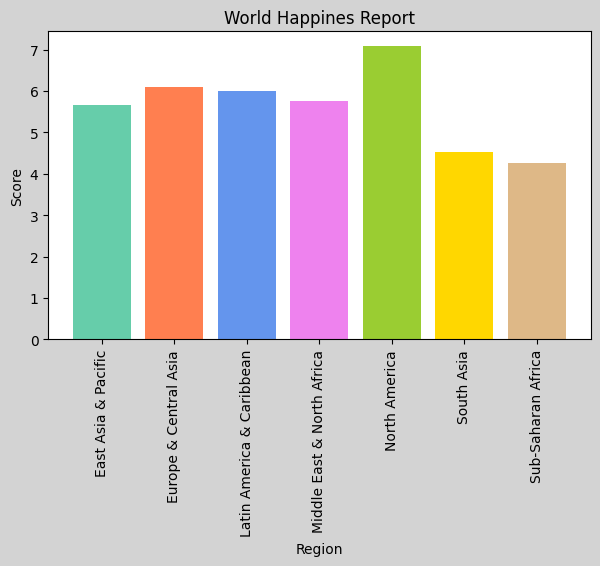

In [11]:
df = pd.merge(df_happyWW, df_meta.rename(columns={'TableName':'country_or_region'}), on="country_or_region")

fig, ax = plt.subplots(1,1, figsize=(7,4), facecolor='lightgray')
colors2 = colors +  ['burlywood']
df_grp = df.groupby('Region')[['score']].mean()
for i, name in enumerate(df_grp.index.tolist()):
    plt.bar(name, df_grp.loc[name], label=name, color=colors2[i], align='center');
plt.ylabel('Score')
plt.xlabel('Region')
plt.title('World Happines Report', fontsize=12)
plt.xticks(rotation = 90);

# FIN